In [81]:
import pandas as pd


# Assign colum names to the dataset
names = ['Date', 'Price']
# Read dataset to pandas dataframe
df = pd.read_csv('stock.csv', names=names) 
#Check dayWeek
df['Date']=pd.to_datetime(df['Date'])
df['D']=df['Date'].dt.dayofweek
df.iloc[:,2:15]=df.iloc[:,2:15].astype(float)
df.head()

,Date,Price,D
1537,2013-12-31,110.80,1.0
1538,2013-12-30,111.21,0.0
1539,2013-12-27,112.18,4.0
1540,2013-12-26,111.98,3.0
1541,2013-12-24,111.90,1.0


In [82]:
for y in range(1,6):
    df['%_p'+str(y)]=100*(1-df['Price'].shift(y)/df['Price'])
df.head(5)

,Date,Price,D,%_p1,%_p2,%_p3,%_p4,%_p5
1537,2013-12-31,110.80,1.0,NaN,NaN,NaN,NaN,NaN
1538,2013-12-30,111.21,0.0,0.368672,NaN,NaN,NaN,NaN
1539,2013-12-27,112.18,4.0,0.864682,1.230166,NaN,NaN,NaN
1540,2013-12-26,111.98,3.0,-0.178603,0.687623,1.053760,NaN,NaN
1541,2013-12-24,111.90,1.0,-0.071492,-0.250223,0.616622,0.983021,NaN


In [83]:
import numpy as np
df['Max']=df[["%_p1", "%_p2","%_p3","%_p4","%_p5"]].max(axis=1)
df['Min']=df[["%_p1", "%_p2","%_p3","%_p4","%_p5"]].min(axis=1)
df=df.replace([np.inf, -np.inf], np.nan)
df=df.dropna()

In [84]:
df['y']=0
df.loc[(df['Min'] <=-2), 'y'] = -1
df.loc[(df['Max'] >=1 ), 'y'] = 1
df.loc[(df['Max'] >=1 ) & (df['Min'] <=-2 ), 'y'] = 2
df.head(35)

,Date,Price,D,%_p1,%_p2,%_p3,%_p4,%_p5,Max,Min,y
1542,2013-12-23,111.56,0.0,-0.304769,-0.376479,-0.555755,0.313733,0.681248,0.681248,-0.555755,0
1543,2013-12-20,111.77,4.0,0.187886,-0.116310,-0.187886,-0.366825,0.501029,0.501029,-0.366825,0
1544,2013-12-19,110.29,3.0,-1.341917,-1.151510,-1.459788,-1.532324,-1.713664,-1.151510,-1.713664,0
1545,2013-12-18,109.63,2.0,-0.602025,-1.952020,-1.760467,-2.070601,-2.143574,-0.602025,-2.143574,-1
1546,2013-12-17,108.44,1.0,-1.097381,-1.706013,-3.070823,-2.877167,-3.190705,-1.097381,-3.190705,-1
1547,2013-12-16,110.47,0.0,1.837603,0.760387,0.162940,-1.176790,-0.986693,1.837603,-1.176790,1
1548,2013-12-13,108.83,4.0,-1.506937,0.358357,-0.735091,-1.341542,-2.701461,0.358357,-2.701461,-1
1549,2013-12-12,108.67,3.0,-0.147235,-1.656391,0.211650,-0.883408,-1.490752,0.211650,-1.656391,0
1550,2013-12-11,109.70,2.0,0.938924,0.793072,-0.701914,1.148587,0.063810,1.148587,-0.701914,1
1551,2013-12-10,109.38,1.0,-0.292558,0.649113,0.502834,-0.996526,0.859389,0.859389,-0.996526,0


In [85]:
X = df.iloc[:, 1:-1]
y=df.iloc[:,-1]
X.head(5)

,Price,D,%_p1,%_p2,%_p3,%_p4,%_p5,Max,Min
1542,111.56,0.0,-0.304769,-0.376479,-0.555755,0.313733,0.681248,0.681248,-0.555755
1543,111.77,4.0,0.187886,-0.116310,-0.187886,-0.366825,0.501029,0.501029,-0.366825
1544,110.29,3.0,-1.341917,-1.151510,-1.459788,-1.532324,-1.713664,-1.151510,-1.713664
1545,109.63,2.0,-0.602025,-1.952020,-1.760467,-2.070601,-2.143574,-0.602025,-2.143574
1546,108.44,1.0,-1.097381,-1.706013,-3.070823,-2.877167,-3.190705,-1.097381,-3.190705


In [86]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50) 
X_train , y_train
X_test.size

3465

In [87]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 
X_train

array([[ 0.43006433, -0.72119932,  0.52661561, ...,  0.34312508,
         0.37195914,  1.10391689],
       [ 1.37609273,  0.71372576,  0.16794772, ...,  0.09835287,
        -0.13280933,  0.65823818],
       [ 0.44454435, -0.00373678, -0.2716827 , ..., -0.58510915,
        -0.79832003, -0.17922558],
       ...,
       [ 0.2981352 ,  0.71372576,  0.78018565, ...,  0.25483558,
        -0.01252412,  0.74149462],
       [-0.29715478, -0.00373678, -1.14114583, ..., -0.53547063,
        -1.25443187, -0.73234809],
       [-0.54009745, -0.72119932,  2.07010308, ...,  2.42785584,
         2.67366336,  2.2181112 ]])

In [88]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


clf = tree.DecisionTreeClassifier(criterion='gini')
#clf= RandomForestClassifier(n_estimators=1000, random_state=0,verbose=1) 

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train.values.reshape(-1))

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
a,b,c,d,=confusion_matrix(y_test,y_pred)


[[112   0   0   0]
 [  0  69   0   0]
 [  0   1 177   1]
 [  0   0   0  25]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       112
           0       0.99      1.00      0.99        69
           1       1.00      0.99      0.99       179
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99       385
   macro avg       0.99      1.00      0.99       385
weighted avg       0.99      0.99      0.99       385



In [89]:
prec=round((2*a[0]-b[0]*0.5-c[0]-d[0])/(a[0]+b[0]+c[0]+d[0]),4)

prec,(2*a[0]-b[0]*0.5-c[0]-d[0])/sum(a)

(2.0, 2.0)

In [90]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,class_names=['-1','0','1','2']) 
graph = graphviz.Source(dot_data) 
graph.render('tic') 

'tic.pdf'

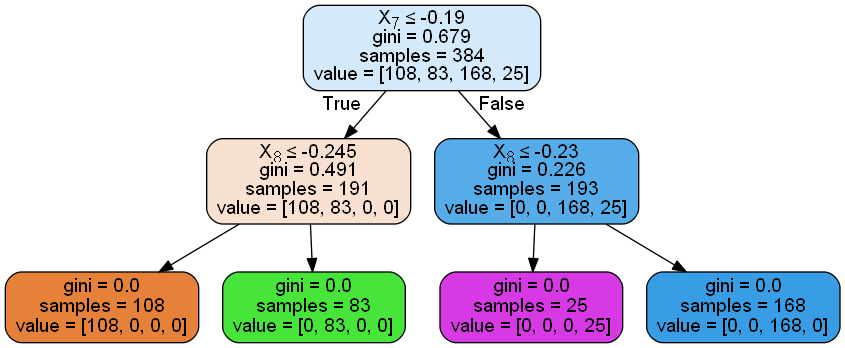

In [91]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
